In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [140]:
data = pd.read_csv(r'C:\Users\Ajay Kumar\Downloads\archive (3)\symbols_valid_meta.csv')

In [141]:
prices = data['Round Lot Size'].values.reshape(-1, 1)

In [142]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [143]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [144]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [145]:
sequence_length = 30  

In [146]:
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [147]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [148]:
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=1)

Epoch 1/5
3205/3205 [==============================] - 57s 17ms/step - loss: 0.0029
Epoch 2/5
3205/3205 [==============================] - 53s 17ms/step - loss: 8.9271e-04
Epoch 3/5
3205/3205 [==============================] - 53s 16ms/step - loss: 8.4480e-04
Epoch 4/5
3205/3205 [==============================] - 53s 17ms/step - loss: 7.8214e-04
Epoch 5/5
3205/3205 [==============================] - 96s 30ms/step - loss: 7.6192e-04


In [149]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

50/50 [==============================] - 1s 10ms/step


In [150]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [151]:
train_data_plot = np.empty_like(prices)
train_data_plot[:,:] = np.nan

In [152]:
train_data_plot[sequence_length:len(train_predictions)+sequence_length, :] = train_predictions

In [153]:
test_data_plot = np.empty_like(prices)
test_data_plot[:,:] = np.nan

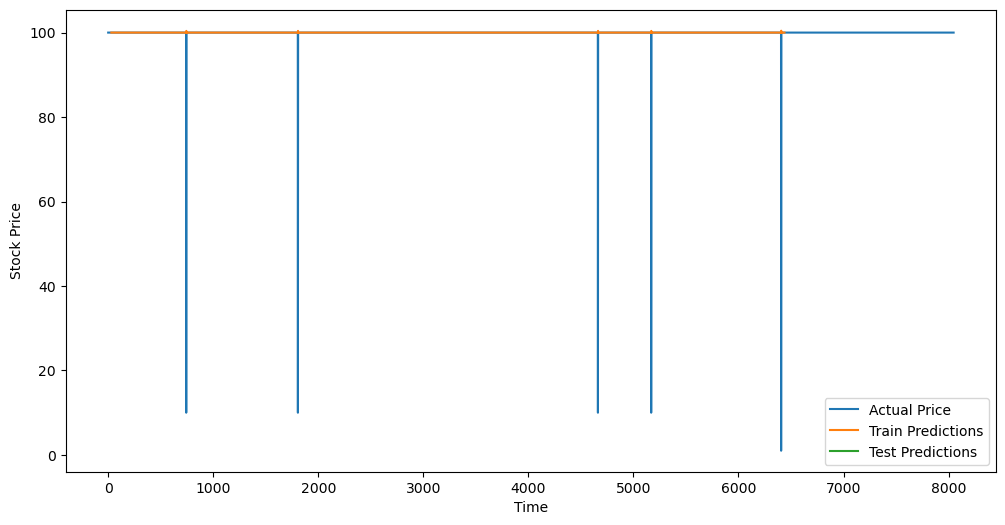

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Price')
plt.plot(train_data_plot, label='Train Predictions')
plt.plot(test_data_plot, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()